In [ ]:
from IPython.display import Audio
import numpy as np
from matplotlib import pyplot as plt
import librosa
import librosa.display
%matplotlib inline

In [ ]:
#carrega um áudio padrão de exemplo, através da função "load", com o argumento "librosa.util.example_audio_file()"
# a variável "x" é o tempo, e a "sr" é a amplitude da onda sonora como função do tempo
# podemos especificar a taxa de amostragem com o argumento "sr"
x , sr = librosa.load('/content/adoniran_barbosa_o_trem_das_onze.wav', sr=None) # sampling de 44.1kHz

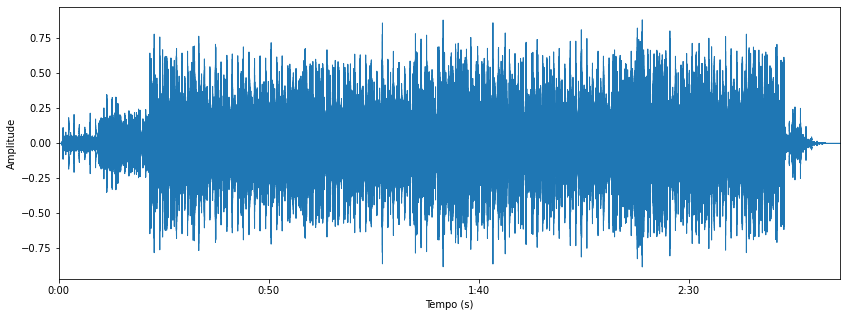

In [ ]:
# ajusta o tamanho do plot
plt.figure(figsize=(14, 5))
# plota a onda
librosa.display.waveplot(x, sr=sr)
# define a label dos eixos
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
# exibe o plot
plt.show()

## Transformada de Fourier:

$$F(\omega) = \int_{-\infty}^{\infty}f(t)e^{i\omega t}dt$$

\

$$e^{i\omega t} = \cos(\omega t) + i\sin(\omega t)$$

\


$$f(x) = \frac{a_0}{2} + \sum_{n=1}^{\infty} [a_n\cos(\frac{n\pi x}{L}) + b_n\sin(\frac{n\pi x}{L}) ]$$


\


Utilizada para passar uma função do domínio do tempo para o domínio da frequência.

In [ ]:
from scipy.io import wavfile as wav 
from scipy.fftpack import fft

In [ ]:
rate, data = wav.read('adoniran_barbosa_o_trem_das_onze.wav')

In [ ]:
fft_out = fft(data)

In [ ]:
fft_out

array([[0.-0.j, 0.-0.j],
       [0.-0.j, 0.-0.j],
       [0.-0.j, 0.-0.j],
       ...,
       [0.-0.j, 0.-0.j],
       [0.-0.j, 0.-0.j],
       [0.-0.j, 0.-0.j]])

$$z = x + jy$$

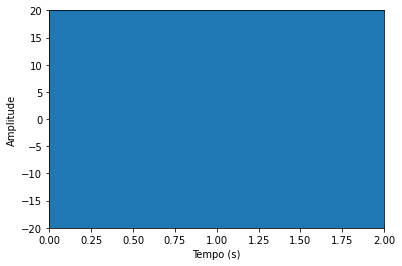

In [ ]:
#definindo as características da onda sonora
fs  = 44000 # amostragem de 44kHz. Neste caso, essa taxa será usada para a reprodução do áudio
A   = 20     # Amplitude (arbitrário)
t_i = 2     # tempo do sinal em segundos
f0  = 1200  # 1.2kHz frequência fundamental do áudio, dentro do espectro audível.
t   = np.arange(0, t_i, 1.0 / fs) # quantização uniforme de fs partes em 1 segundo

# definição da onda sonora com as características acima
wav = A * np.sin(2 * np.pi * f0 * t ) # onda senoidal

# np.cos()
# pi = 3.14

# vamos plotar para ver a onda sonora
plt.plot(t, wav)
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.axis([0, t_i, -A, A])
plt.show()

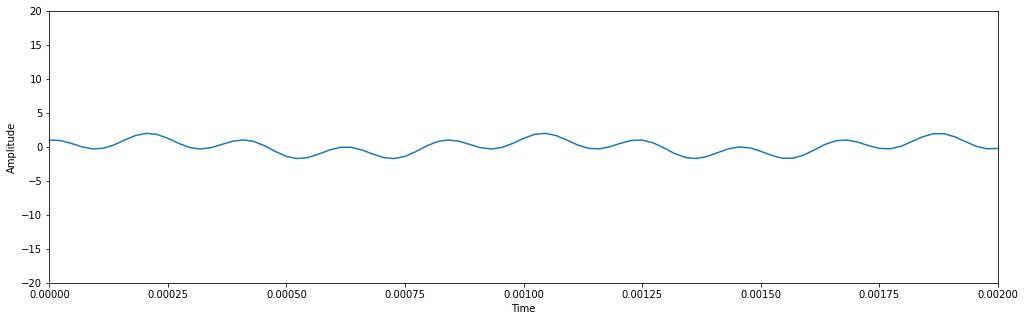

In [ ]:
# redefinindo o tempo do sinal para 0.002 segundos
t_i = 0.002 # max time

# redefinindo a onda sonora
wav = np.sin(2 * np.pi * f0 * t) # onda
wav_2 = np.cos(2 * np.pi * 4800 * t)

wav_final = wav + wav_2

# plotando a onda sonora no intervalo de 0.002 segundos
f, ax = plt.subplots(figsize=(17,5))
plt.plot(t, wav_final)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.axis([0, t_i, -A, A])
plt.show()

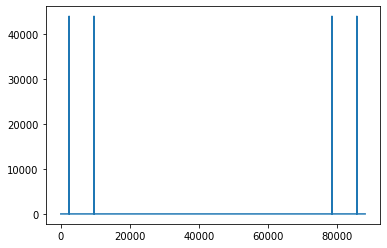

In [ ]:
freq = np.fft.fftfreq(fs)

fft_cal = np.fft.fft(wav_final)


plt.plot(np.abs(fft_cal))